In [1]:
######### PART 1 - Installation and Intial Setup #########

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1682087553656_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1682087553656_0003,pyspark,idle,Link,Link,✔


In [3]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/8f/8dbe2d4efc4c0b08ec67d6efb7cc31fbfd688c80afad85f65980633b0d37/kiwisolver-1.4.4-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

In [4]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
## ACTORS

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

In [7]:
actors.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

In [8]:
## GENRES

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
genres.select("titleType", "primaryTitle", "genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

In [10]:
genres.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [11]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

In [12]:
#MOVIE ACTORS

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [14]:
movie_actors.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

In [15]:
#MOVIE RATINGS

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [17]:
movie_ratings.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
|tt0000006|          5.2|     102|
|tt0000007|          5.5|     615|
|tt0000008|          5.4|    1667|
|tt0000009|          5.4|      81|
|tt0000010|          6.9|    5545|
+---------+-------------+--------+
only showing top 10 rows

In [18]:
#OVERVIEW of Data 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# Display number of rows and columns in the actors DataFrame
print("Number of rows: ", actors.count())
print("Number of columns: ", len(actors.columns))

# Display number of rows and columns in the genres DataFrame
print("Number of rows: ", genres.count())
print("Number of columns: ", len(genres.columns))

# Display number of rows and columns in the movie_actors DataFrame
print("Number of rows: ", movie_actors.count())
print("Number of columns: ", len(movie_actors.columns))

# Display number of rows and columns in the movie_ratings DataFrame
print("Number of rows: ", movie_ratings.count())
print("Number of columns: ", len(movie_ratings.columns))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of rows:  9706922
Number of columns:  6
Number of rows:  6321302
Number of columns:  9
Number of rows:  36468817
Number of columns:  6
Number of rows:  993153
Number of columns:  3

In [20]:
##### PART 2 - Analyzing Genres #######

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
genres.select("tconst","titleType","genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

In [22]:
from pyspark.sql.functions import split, explode

# Split genres by comma and create a new column 'genre'
genre_split = genres.withColumn('genre', explode(split(genres.genres, ',')))

# Display the resulting table
genre_split.select('tconst', 'titleType', 'genre').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

In [23]:
####### Total Unique Genres ######


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
genre_split = genres.withColumn('genre', explode(split(genres.genres, ',')))

# Get the distinct genres and count them
total_genres = genre_split.select("genre").distinct().count()

# Print the result
print("Total number of unique genres in the movie category: ", total_genres)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of unique genres in the movie category:  29

In [25]:
#What are the unique genres available?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
unique_genres = genre_split.select("genre").distinct()
unique_genres.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

In [27]:
from pyspark.sql.functions import col

# Get the distinct genres and filter out null values
unique_genres = genre_split.select("genre").distinct().filter(col("genre") != "\\N")

# Show the unique genres
unique_genres.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [28]:
total_genres = unique_genres.select("genre").distinct().count()

# Print the result
print("Total number of unique genres in the movie category: ", total_genres)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total number of unique genres in the movie category:  28

In [29]:
#### TOP GENRES BY MOVIES ######

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
from pyspark.sql.functions import col
genre_split_filtered = genre_split.filter(col('titleType') == 'movie')

filtered_df = genre_split_filtered.filter(col('genre') != '\\N')

joined_dataframe = movie_ratings.join(filtered_df,"tconst","inner")

joined_dataframe.select('genre','averageRating').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

In [31]:
from pyspark.sql.functions import avg

avg_rating_by_genre = (
    joined_dataframe
    .select(col("genre"), col("averageRating").cast("float").alias("averageRating"))
    .groupby("genre")
    .agg(avg("averageRating").alias("avg_rating"))
)
avg_rating_by_genre.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|    Mystery|5.940437537126316|
|    Musical|6.203246053185319|
|     Action|5.718734067904495|
|      Sport|6.600145190943391|
|  Talk-Show|5.800000190734863|
|    Romance|6.125714179294426|
|   Thriller|5.625967567519544|
| Reality-TV|6.379310377712907|
|     Family|6.250560452699635|
|    Fantasy|5.924820762891499|
|    History|6.822718117193864|
|  Animation|6.326203749467441|
|  Film-Noir|6.636246780503378|
|      Short|7.259999942779541|
|     Sci-Fi|5.325150006900168|
|       News|7.200916040944689|
|      Drama|6.288080211097538|
|Documentary|7.245469805371099|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
+-----------+-----------------+
only showing top 20 rows

In [32]:
### Horizontal Bar Chart of Top Genres

#With this data available, let us now build a barchart of all genres 

#**HINT**: don't forget about the matplotlib magic!

#%matplot plt



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
from pyspark.sql.functions import desc

genre_avg_rating = avg_rating_by_genre.orderBy(desc('avg_rating'))
genre_avg_rating.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|      Short|7.259999942779541|
|Documentary|7.245469805371099|
|       News|7.200916040944689|
|  Biography|6.983637643044585|
|  Game-Show|6.974999904632568|
|    History|6.822718117193864|
|      Music|6.752020207214588|
|  Film-Noir|6.636246780503378|
|      Sport|6.600145190943391|
|        War|6.483807036278403|
| Reality-TV|6.379310377712907|
|  Animation|6.326203749467441|
|      Drama|6.288080211097538|
|     Family|6.250560452699635|
|    Musical|6.203246053185319|
|    Romance|6.125714179294426|
|      Crime|6.026013333109149|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
|    Mystery|5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

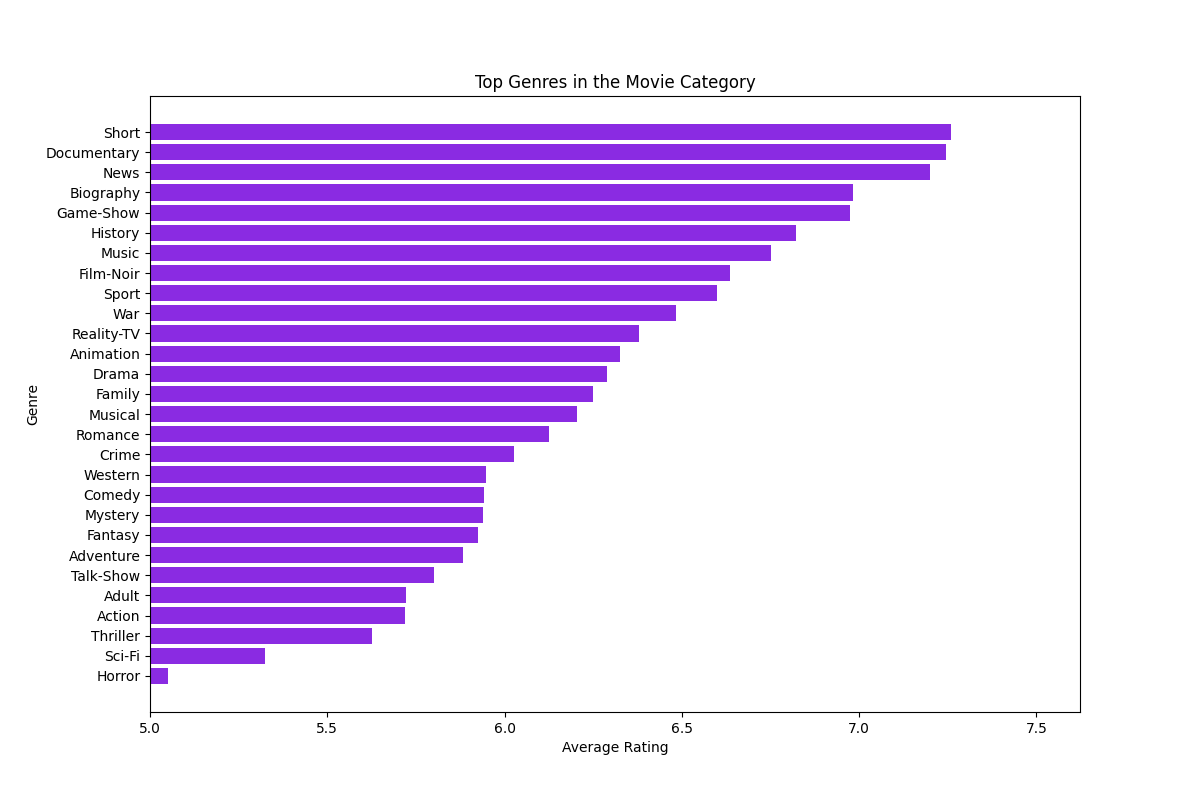

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import asc

genre_avg_rating = avg_rating_by_genre.orderBy(asc('avg_rating'))
genre_ratings_pd = genre_avg_rating.toPandas()

# Plot the data using Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(genre_ratings_pd["genre"], genre_ratings_pd["avg_rating"], color="blueviolet")
ax.set_title("Top Genres in the Movie Category")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Genre")

# Set the minimum value of the x-axis to 5
ax.set_xlim([5.0, None])

# Display the plot using the %matplot magic command
%matplot plt


In [35]:
## PART 3 - Analyzing Job Categories


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
## Total Unique Job Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
### What is the total number of unique job categories? ####

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [39]:
movie_actors.select('tconst','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [61]:
from pyspark.sql.functions import countDistinct

num_categories = movie_actors.select(countDistinct('category')).collect()[0][0]
print('The total number of unique job categories is:', num_categories)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The total number of unique job categories is: 12

In [41]:
unique_category = movie_actors.select('category').distinct()
unique_category.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

In [42]:
## Top Job Categories


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
### Counts of Titles / Job Category

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
from pyspark.sql.functions import count

category_count = movie_actors.groupBy('category').agg(count('*').alias('count'))

category_count.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

In [45]:
### Bar Chart of Top Job Categories

#With this data available, let us now build a barchart of the top 5 categories. 

#HINT: don't forget about the matplotlib magic!


#%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
category_count.orderBy(desc('count')).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

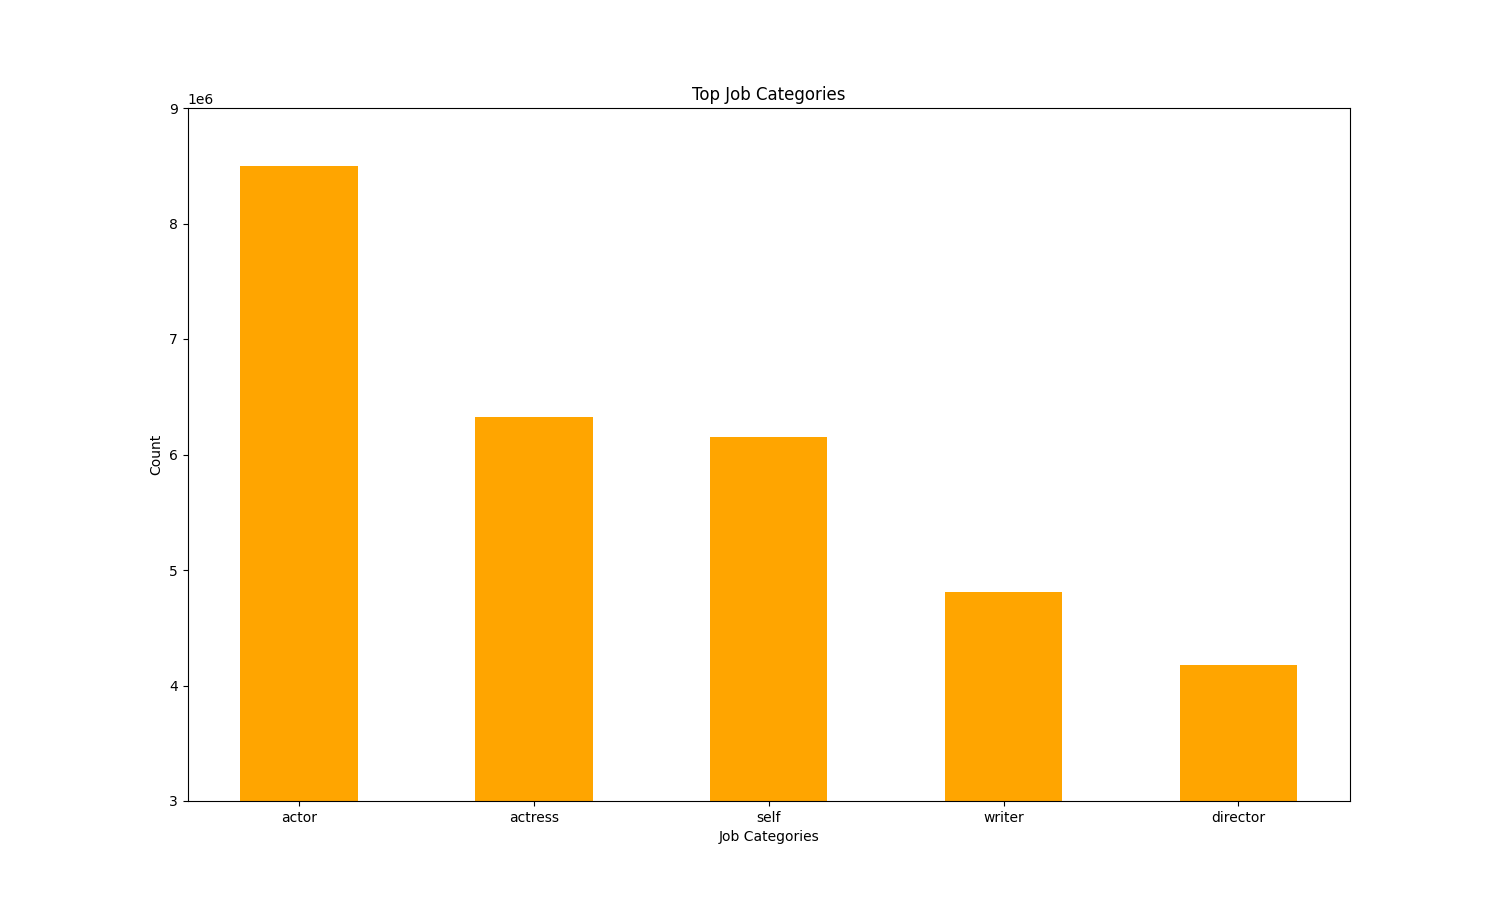

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc

category_count_pd = category_count.orderBy(desc('count')).limit(5).toPandas()

# Set the width of the bars
bar_width = 0.5

# Plot the data using Matplotlib
fig, ax = plt.subplots(figsize=(15,9))

ax.bar(category_count_pd["category"], category_count_pd["count"], color="orange", width=bar_width)
ax.set_title("Top Job Categories")
ax.set_xlabel("Job Categories")
ax.set_ylabel("Count")

# Set the minimum value of the y-axis to 3m and max to 9m
ax.set_ylim([3000000, 9000000])


# Display the plot using the %matplot magic command
%matplot plt

In [48]:
# PART 4 - Answer to the following questions:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
#### 1)

#joining tables to do query
actors_genres = actors.join(movie_actors,actors.nconst == movie_actors.nconst, 'inner').drop(actors.nconst)
joined_actors_genres = actors_genres.join(genres,genres.tconst==actors_genres.tconst, 'inner').drop(genres.tconst)

#Finding result
movies = joined_actors_genres.filter((joined_actors_genres.primaryName=="Johnny Depp") | (joined_actors_genres.primaryName=="Helena Bonham Carter"))
movies = movies.filter(movies.titleType=='movie').groupBy('tconst','primaryTitle','startYear').count().filter('count = 2')
movies.select('primaryTitle').show(truncate=False)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
+----------------------------------------------+

In [51]:
## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
#2)
# Finding result
bradpitt = joined_actors_genres.filter((joined_actors_genres.primaryName=="Brad Pitt"))
bradpitt = bradpitt.filter(bradpitt.titleType == 'movie').filter(bradpitt.startYear > 2010).select('primaryTitle', 'startYear')
BP_after2010_movies = bradpitt.orderBy(desc('startYear'))
BP_after2010_movies.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Irresistible                     |2020     |
|Kajillionaire                    |2020     |
|Once Upon a Time ... in Hollywood|2019     |
|Ad Astra                         |2019     |
|The King                         |2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Allied                           |2016     |
|Voyage of Time: Life's Journey   |2016     |
|The Big Short                    |2015     |
|Hitting the Apex                 |2015     |
|By the Sea                       |2015     |
|Fury                             |2014     |
|12 Years a Slave                 |2013     |
|Kick-Ass 2                       |2013     |
|World War Z                      |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 

In [53]:
## 3) What is the number of "movies" "acted" by "Zendaya" per year?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
#3) 
# Joining tables to do query
actors_genres = actors.join(movie_actors,actors.nconst == movie_actors.nconst, 'inner').drop(actors.nconst)
joined_actors_genres = actors_genres.join(genres,genres.tconst==actors_genres.tconst, 'inner').drop(genres.tconst)

#Finding result
zendaya = joined_actors_genres.filter((joined_actors_genres.primaryName=="Zendaya")&(joined_actors_genres.titleType=="movie"))
zendaya = zendaya.filter(zendaya.category=='actress').select('startYear')
zendaya = zendaya.filter(zendaya.startYear.endswith('N')==False)
zendaya.groupby('startYear').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2020|    1|
|     2018|    2|
|     2017|    1|
+---------+-----+

In [55]:
##### 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
from pyspark.sql.functions import col, when

# Load the title.basics dataset and filter only the movies released in 2019
movies_2019 = genres.filter((col("titleType") == "movie") & (col("startYear") == 2019))

# Load the title.ratings dataset and filter only the movies with an average rating greater than 9.7
top_rated_movies = movie_ratings.filter(col("averageRating") > 9.7)

# Join the two datasets on the tconst column
joined_data = movies_2019.join(top_rated_movies, "tconst")

# Create a new column that maps averageRating to a numeric value for sorting
joined_data = joined_data.withColumn("rating_value", when(col("averageRating") == 10.0, 1).otherwise(0))
joined_data = joined_data.withColumn("rating_value", when(col("averageRating") == 9.9, 2).otherwise(col("rating_value")))
joined_data = joined_data.withColumn("rating_value", when(col("averageRating") == 9.8, 3).otherwise(col("rating_value")))

# Show the resulting dataframe with the required columns, sorted by rating_value and averageRating
joined_data = joined_data.select("primaryTitle", "averageRating").orderBy(col("rating_value"), col("averageRating").desc())
joined_data.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Our Scripted Life                                |10.0         |
|Love in Kilnerry                                 |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|Superhombre                                      |9.9          |
|The Cardinal                                     |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|Kamen Rid

In [57]:
## Extra Credit - Analysis of your choice

## Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

### You must join at least two datasets.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
## For this section. We'll answer this question: "Highest Rated Movies Featuring Leonardo DiCaprio wtih a minimum rating of 8.0"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
actors_genres = actors.join(movie_actors,actors.nconst == movie_actors.nconst, 'inner').drop(actors.nconst)
joined_actors_genres = actors_genres.join(genres,genres.tconst==actors_genres.tconst, 'inner').drop(genres.tconst)
extra_credit_df = joined_actors_genres.join(movie_ratings,movie_ratings.tconst == joined_actors_genres.tconst, 'inner').drop(movie_ratings.tconst)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
from pyspark.sql.functions import desc

leodicaprio_movies = extra_credit_df.filter(extra_credit_df.primaryName == "Leonardo DiCaprio") \
                        .filter(extra_credit_df.titleType == "movie") \
                        .filter(extra_credit_df.averageRating >= 8.0) \
                        .select("primaryTitle", "averageRating") \
                        .orderBy(desc("averageRating"))

leodicaprio_movies.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+-------------+
|primaryTitle                                |averageRating|
+--------------------------------------------+-------------+
|Inception                                   |8.8          |
|The Clock                                   |8.8          |
|The Departed                                |8.5          |
|Django Unchained                            |8.4          |
|Before the Flood                            |8.3          |
|The Wolf of Wall Street                     |8.2          |
|Shutter Island                              |8.1          |
|Catch Me If You Can                         |8.1          |
|Struggle: The Life and Lost Art of Szukalski|8.0          |
|The Revenant                                |8.0          |
|Once Upon a Time ... in Hollywood           |8.0          |
|Blood Diamond                               |8.0          |
+--------------------------------------------+-------------+